

<div class="alert alert-block alert-success">
<b> Comentário Geral do revisor: </b> <a class="tocSkip"></a>
    
    Tudo certo agora. Parabéns. Uma opção para avaliar as variâncais é usar o teste Levene. Desejo sucesso na jornada.

</div>

# Análise Exploratória de Dados

In [1]:
import pandas as pd
import scipy.stats as stats
from scipy import stats

trips_data = pd.read_csv('/datasets/project_sql_result_01.csv')
average_trips_data = pd.read_csv('/datasets/project_sql_result_04.csv')

print(trips_data.head())
print(average_trips_data.head())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


Estudar os dados e verificar os tipos de dados.

In [2]:
print(trips_data.info())
print(average_trips_data.info())

print(trips_data.describe())
print(average_trips_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50

Identificar os 10 principais bairros em termos de destinos.

In [3]:
top_10_bairros = average_trips_data.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_bairros)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


# Gráfico 1: Empresas de táxi e número de corridas

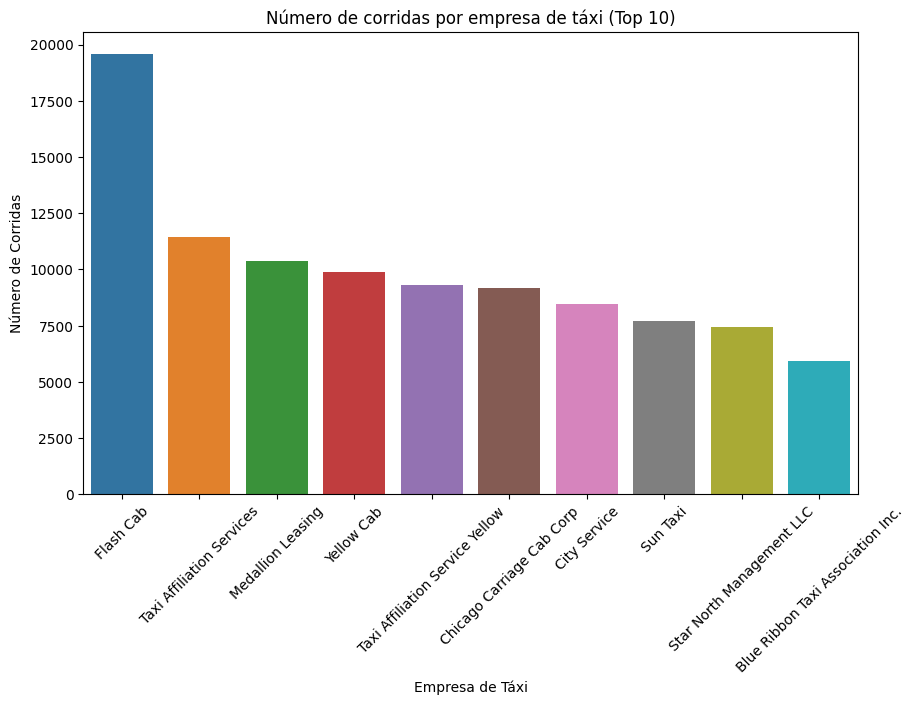

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_companies = trips_data.sort_values(by='trips_amount', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='company_name', y='trips_amount', data=top_10_companies)
plt.title('Número de corridas por empresa de táxi (Top 10)')
plt.xlabel('Empresa de Táxi')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=45)
plt.show()



# Gráfico 2: Top 10 bairros por número de corridas

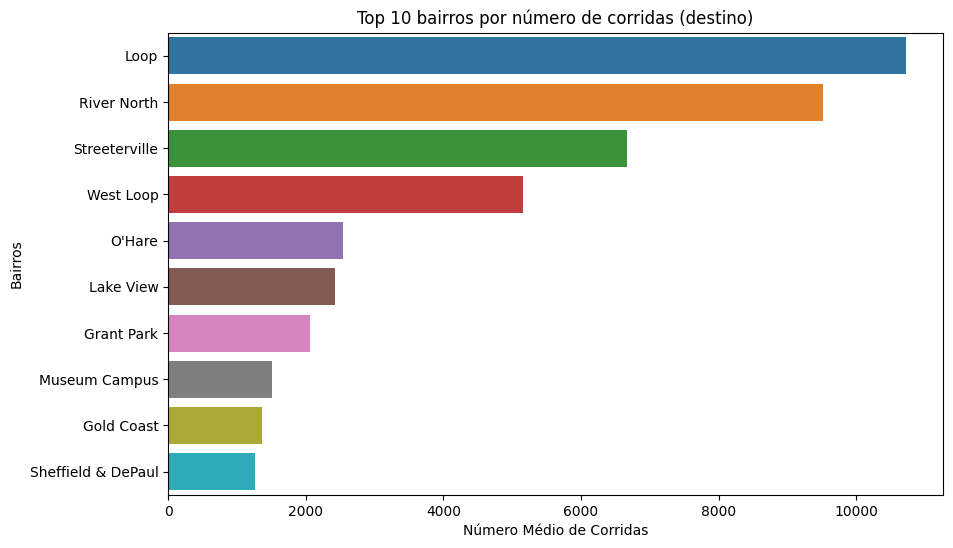

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_bairros)
plt.title('Top 10 bairros por número de corridas (destino)')
plt.xlabel('Número Médio de Corridas')
plt.ylabel('Bairros')
plt.show()


In [6]:
loop_to_ohare_data = pd.read_csv('/datasets/project_sql_result_07.csv')

print(loop_to_ohare_data.head())


              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [7]:
loop_to_ohare_data['start_ts'] = pd.to_datetime(loop_to_ohare_data['start_ts'])

loop_to_ohare_data['is_saturday'] = loop_to_ohare_data['start_ts'].dt.weekday == 5

saturdays_rainy = loop_to_ohare_data[(loop_to_ohare_data['is_saturday']) & 
                                      (loop_to_ohare_data['weather_conditions'] == 'Bad')]
saturdays_clear = loop_to_ohare_data[(loop_to_ohare_data['is_saturday']) & 
                                     (loop_to_ohare_data['weather_conditions'] == 'Good')]

print(f"Sábados chuvosos: {saturdays_rainy.shape[0]}")
print(f"Sábados não chuvosos: {saturdays_clear.shape[0]}")


Sábados chuvosos: 180
Sábados não chuvosos: 888


In [8]:
t_stat, p_value = stats.ttest_ind(saturdays_rainy['duration_seconds'], saturdays_clear['duration_seconds'], nan_policy='omit')

alpha = 0.05

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Rejeitamos a hipótese nula: A duração média das corridas do Loop para O'Hare muda nos sábados chuvosos.")
else:
    print("Não rejeitamos a hipótese nula: Não há evidências suficientes para afirmar que a duração média muda nos sábados chuvosos.")


T-Statistic: 6.946177714041499
P-Value: 6.517970327099473e-12
Rejeitamos a hipótese nula: A duração média das corridas do Loop para O'Hare muda nos sábados chuvosos.


# Definir a hipótese nula e alternativa

In [14]:
group1_data = trips_data['trips_amount']
group2_data = average_trips_data['average_trips'] 

var_group1 = group1_data.var()
var_group2 = group2_data.var()

print(f"Variância do grupo 1: {var_group1}")
print(f"Variância do grupo 2: {var_group2}")

equal_var = var_group1 == var_group2

t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=equal_var)

alpha = 0.05

if p_value < alpha:
    print("Rejeitamos a hipótese nula: As médias são diferentes.")
else:
    print("Não rejeitamos a hipótese nula: As médias são iguais.")

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")



Variância do grupo 1: 14533708.952132937
Variância do grupo 2: 2939822.6331400108
Rejeitamos a hipótese nula: As médias são diferentes.
T-statistic: 3.040616836880665
P-value: 0.0031851245801265593


# Interpretação dos Resultados

- t-statistic: O valor da estatística t, que mede a diferença entre as médias dos dois grupos.
- p-value: O valor p que nos ajuda a decidir se rejeitamos a hipótese nula (H₀). Se p-value < 0,05, rejeitamos H₀, significando que as médias são estatisticamente diferentes.